In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Keras on Tensorflow

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# Generate Data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Define

In [4]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[28, 28]))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Compile

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
			  optimizer="sgd", metrics=["accuracy"])

# Fit

In [7]:
history = model.fit(X_train, y_train, epochs=10,
					validation_data=(X_valid, y_valid), 
                    verbose=0)

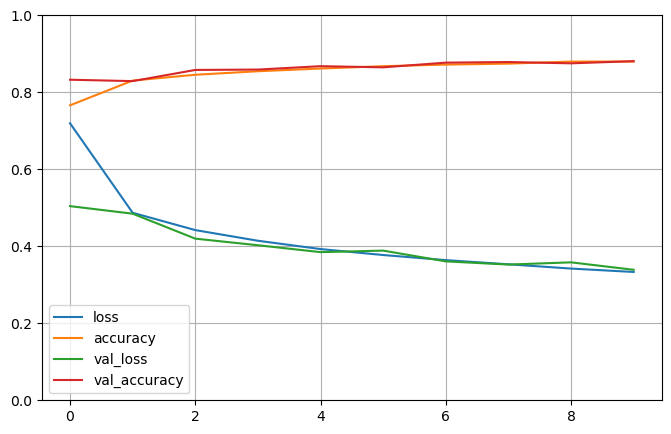

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluate

In [9]:
model.evaluate(X_test, y_test, verbose=0)

[65.76401937217713, 0.83]

# Predict

In [10]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [12]:
y_test[:3]

array([9, 2, 1], dtype=uint8)